# Emotion Detection using LSTM and XGBoost

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df=pd.read_csv('text.csv')
df

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2
416805,416805,i began to realize that when i was feeling agi...,3
416806,416806,i feel very curious be why previous early dawn...,5
416807,416807,i feel that becuase of the tyranical nature of...,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  416809 non-null  int64 
 1   text        416809 non-null  object
 2   label       416809 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 9.5+ MB


In [4]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['label'].value_counts()

label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [7]:
emotion_map={0:'Sadness',
            1:'Joy',
            2:'Love',
            3:'Anger',
            4:'Fear',
            5:'Surprise'}
df['emotion_map']=df['label'].map(emotion_map)

In [8]:
df

,Unnamed: 0,text,label,emotion_map
0,0,i just feel really helpless and heavy hearted,4,Fear
1,1,ive enjoyed being able to slouch about relax a...,0,Sadness
2,2,i gave up my internship with the dmrg and am f...,4,Fear
3,3,i dont know i feel so lost,0,Sadness
4,4,i am a kindergarten teacher and i am thoroughl...,4,Fear
...,...,...,...,...
416804,416804,i feel like telling these horny devils to find...,2,Love
416805,416805,i began to realize that when i was feeling agi...,3,Anger
416806,416806,i feel very curious be why previous early dawn...,5,Surprise
416807,416807,i feel that becuase of the tyranical nature of...,3,Anger


C:\Users\MYPC~1\AppData\Local\Temp/ipykernel_18896/333141326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotion_map', data=df, order=df['emotion_map'].value_counts().index, palette="viridis")


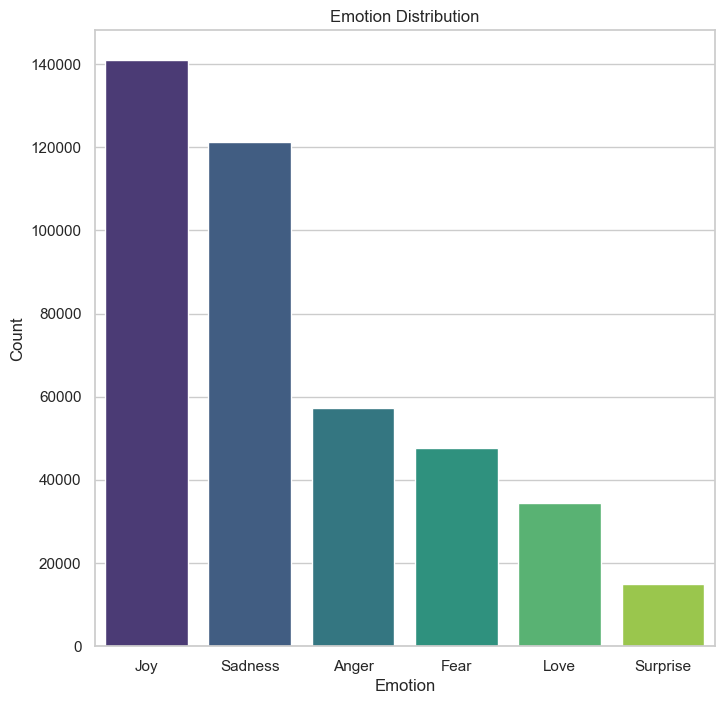

In [9]:
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.countplot(x='emotion_map', data=df, order=df['emotion_map'].value_counts().index, palette="viridis")
plt.title('Emotion Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')

plt.show()

In [10]:
from wordcloud import WordCloud

In [11]:
emotions=df['emotion_map'].unique()
emotions

array(['Fear', 'Sadness', 'Love', 'Joy', 'Surprise', 'Anger'],
      dtype=object)

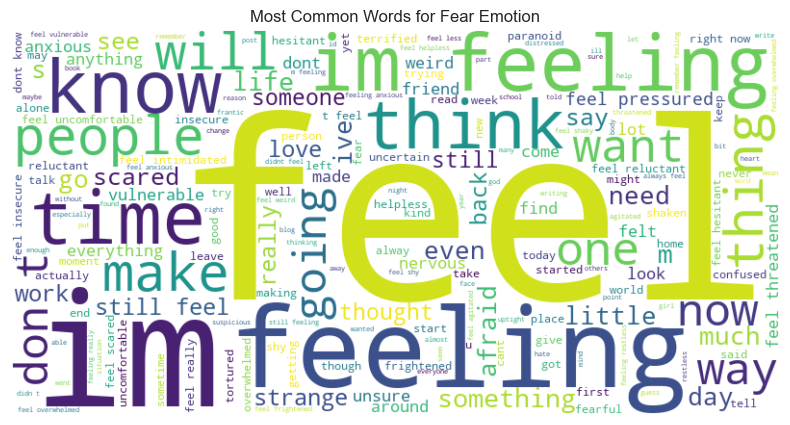

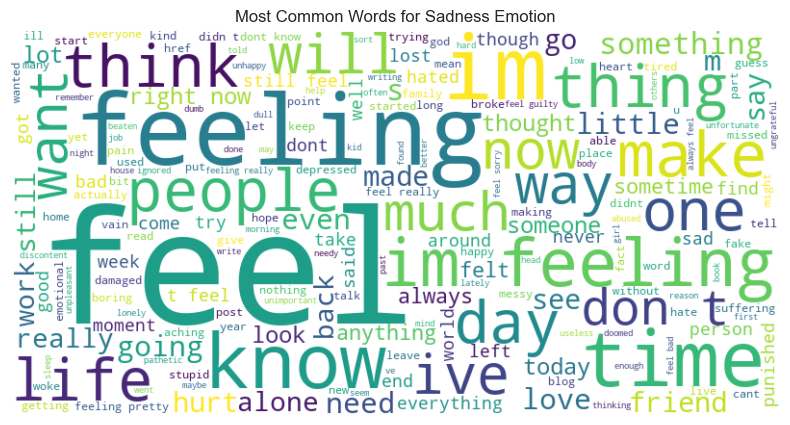

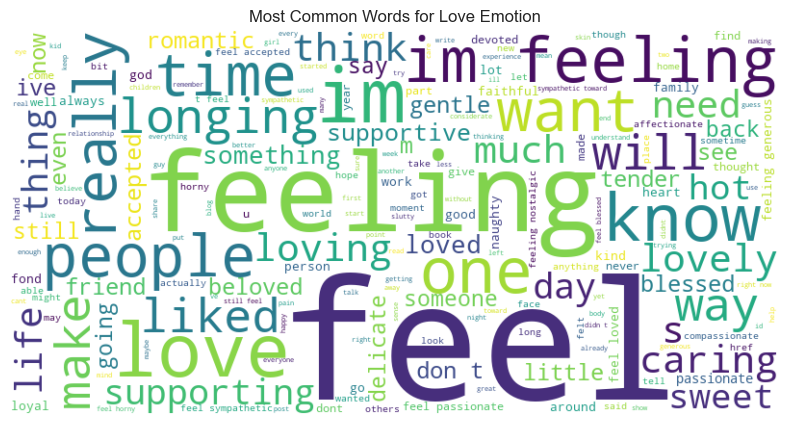

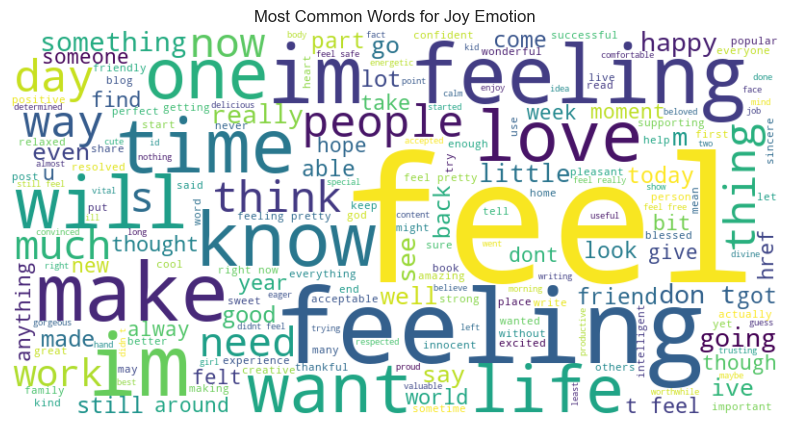

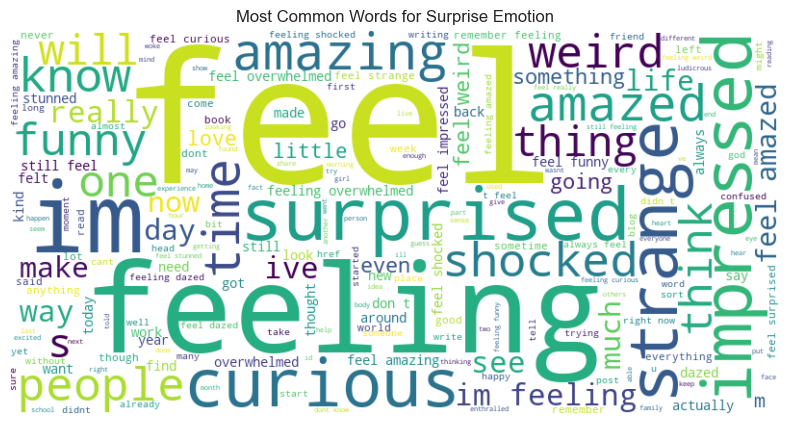

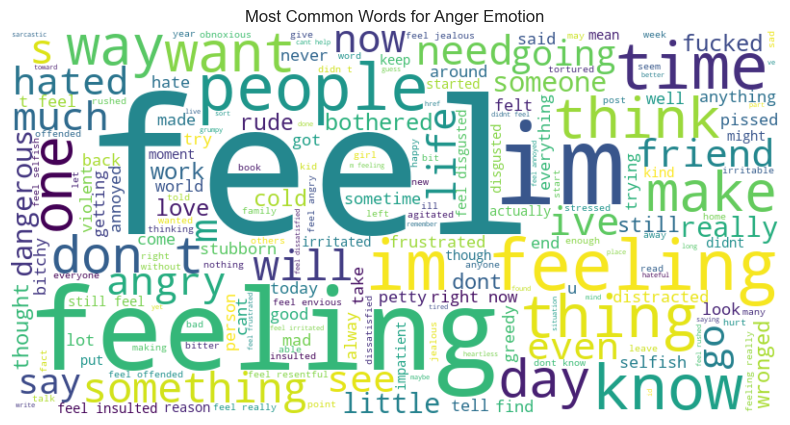

In [12]:
for i in emotions:
    words=' '.join(df[df['emotion_map']==i]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words for {i} Emotion')
    plt.show()

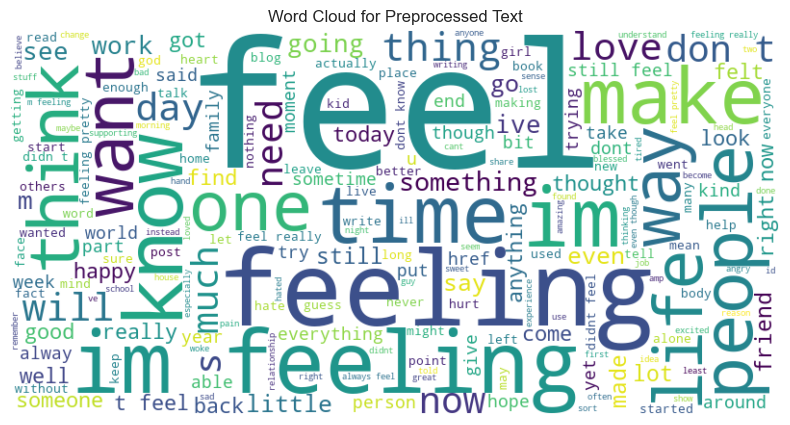

In [13]:
def preprocess_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word.isalpha()])

    return text
df['preprocessed_text'] = df['text'].apply(preprocess_text)
preprocessed_words = ' '.join(df['preprocessed_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(preprocessed_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Preprocessed Text')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.2, random_state=42)

In [15]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (333447,)
X_test: (83362,)
y_train: (333447,)
y_test: (83362,)


In [16]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("\nShapes of TF-IDF Matrices:")
print("X_train_tfidf:", X_train_tfidf.shape)
print("X_test_tfidf:", X_test_tfidf.shape)


Shapes of TF-IDF Matrices:
X_train_tfidf: (333447, 5000)
X_test_tfidf: (83362, 5000)


In [18]:
import xgboost as xgb

In [19]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=6, random_state=42)
xgb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=6,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [20]:
y_pred = xgb_model.predict(X_test_tfidf)

In [21]:
y_pred

array([0, 0, 3, ..., 1, 3, 0])

In [22]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [23]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.8939564789712339

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     24201
           1       0.93      0.89      0.91     28164
           2       0.74      0.90      0.82      6929
           3       0.93      0.86      0.90     11441
           4       0.86      0.84      0.85      9594
           5       0.68      0.89      0.77      3033

    accuracy                           0.89     83362
   macro avg       0.85      0.89      0.86     83362
weighted avg       0.90      0.89      0.90     83362


Confusion Matrix:
 [[22438   685   158   351   460   109]
 [  352 25193  1891   163   214   351]
 [   52   525  6259    46    28    19]
 [  642   436    40  9866   427    30]
 [  301   279    41   147  8080   746]
 [   20   103    13     5   206  2686]]


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'], test_size=0.2, random_state=42)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_padded = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=100, padding='post')
X_test_padded = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=100, padding='post')
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=16, input_length=100))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(units=6, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              41472     
 l)                                                              
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 122,246
Trainable params: 122,246
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, validation_data=(X_test_padded, y_test))

Epoch 1/10
10421/10421 [==============================] - 139s 12ms/step - loss: 0.3078 - accuracy: 0.8715 - val_loss: 0.1265 - val_accuracy: 0.9331
Epoch 2/10
10421/10421 [==============================] - 124s 12ms/step - loss: 0.1107 - accuracy: 0.9358 - val_loss: 0.1030 - val_accuracy: 0.9364
Epoch 3/10
10421/10421 [==============================] - 125s 12ms/step - loss: 0.0960 - accuracy: 0.9395 - val_loss: 0.0961 - val_accuracy: 0.9381
Epoch 4/10
10421/10421 [==============================] - 123s 12ms/step - loss: 0.0914 - accuracy: 0.9412 - val_loss: 0.0958 - val_accuracy: 0.9381
Epoch 5/10
10421/10421 [==============================] - 123s 12ms/step - loss: 0.0886 - accuracy: 0.9418 - val_loss: 0.0958 - val_accuracy: 0.9391
Epoch 6/10
10421/10421 [==============================] - 124s 12ms/step - loss: 0.0868 - accuracy: 0.9422 - val_loss: 0.0959 - val_accuracy: 0.9387
Epoch 7/10
10421/10421 [==============================] - 122s 12ms/step - loss: 0.0851 - accuracy: 0.9427

In [26]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'\nTest Accuracy (LSTM): {accuracy}')

2606/2606 [==============================] - 13s 5ms/step - loss: 0.0983 - accuracy: 0.9381

Test Accuracy (LSTM): 0.9380893111228943


In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

new_text_data = ["Just because you don't have anything better to do, doesn't mean I have to do it for you!"]
tokenizer.fit_on_texts(new_text_data)
new_sequences = tokenizer.texts_to_sequences(new_text_data)
new_padded = pad_sequences(new_sequences, maxlen=100, padding='post') 

predictions = model.predict(new_padded)

predicted_labels = predictions.argmax(axis=1)
class_mapping = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
predicted_class_names = [class_mapping[label] for label in predicted_labels]

print(predicted_class_names)

['Anger']
